In [1]:
import pandas as pd
from google.colab import drive


pd.set_option('display.max_columns', None)

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/Global_Cybersecurity_Threats_2015-2024.csv")

#Data

In [3]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


The data was clean, so i omited some info checks to make things nice and clean.

In [5]:
#Isolating the country
brasil = df.loc[df["Country"] == "Brazil"]

#Analysis

In [6]:
brasil

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
20,Brazil,2015,Ransomware,Retail,49.55,920172,Hacker Group,Weak Passwords,Antivirus,43
24,Brazil,2023,DDoS,Telecommunications,51.84,699007,Hacker Group,Social Engineering,VPN,30
34,Brazil,2023,Phishing,Healthcare,14.51,113777,Nation-state,Weak Passwords,VPN,27
35,Brazil,2020,Phishing,Banking,17.75,739540,Hacker Group,Zero-day,Encryption,31
39,Brazil,2016,DDoS,Education,96.98,140812,Nation-state,Unpatched Software,VPN,71
...,...,...,...,...,...,...,...,...,...,...
2973,Brazil,2016,Man-in-the-Middle,Education,19.59,647998,Insider,Weak Passwords,AI-based Detection,38
2986,Brazil,2015,Malware,Healthcare,88.08,905770,Nation-state,Zero-day,VPN,9
2989,Brazil,2021,Ransomware,Education,18.11,849791,Nation-state,Unpatched Software,VPN,53
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26


In [7]:
#Percentage of attacks by year.
at_year = round(brasil[["Attack Type","Year"]].groupby("Year").value_counts().unstack().transform(lambda x: x/x.sum() * 100,axis = 1),2)
at_year["total"] = at_year.sum(axis=1)
at_year

Attack Type,DDoS,Malware,Man-in-the-Middle,Phishing,Ransomware,SQL Injection,total
Year,,,,,,,
2015,11.54,26.92,3.85,19.23,19.23,19.23,100.00
2016,24.14,17.24,20.69,17.24,3.45,17.24,100.00
2017,24.32,10.81,21.62,16.22,13.51,13.51,99.99
2018,12.12,36.36,9.09,21.21,9.09,12.12,99.99
2019,18.52,18.52,11.11,7.41,18.52,25.93,100.01
2020,20.00,13.33,10.00,30.00,10.00,16.67,100.00
2021,29.41,11.76,11.76,5.88,17.65,23.53,99.99
2022,12.00,16.00,20.00,32.00,8.00,12.00,100.00
2023,14.71,8.82,17.65,17.65,14.71,26.47,100.01


<Axes: ylabel='Attack Source'>

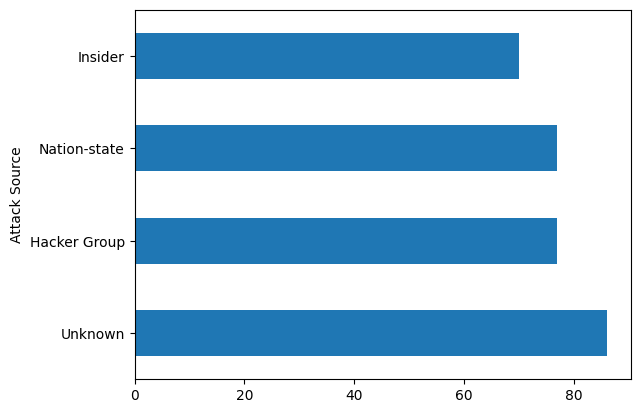

In [8]:
#Most common source attacks
brasil["Attack Source"].value_counts().plot(kind="barh")

<Axes: ylabel='Security Vulnerability Type'>

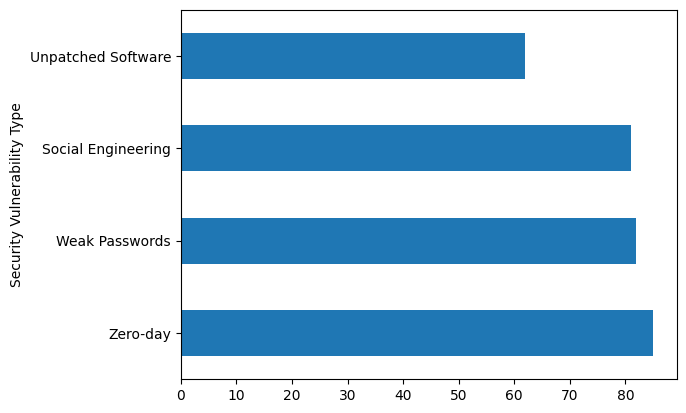

In [9]:
#Monst common Security Vulnerability types
brasil["Security Vulnerability Type"].value_counts().plot(kind="barh")

In [10]:
#Numbers of affected users:
aff_users = brasil["Number of Affected Users"].sum()
print("Total number of Affected Users:", aff_users)

Total number of Affected Users: 168806980


<Axes: ylabel='Defense Mechanism Used'>

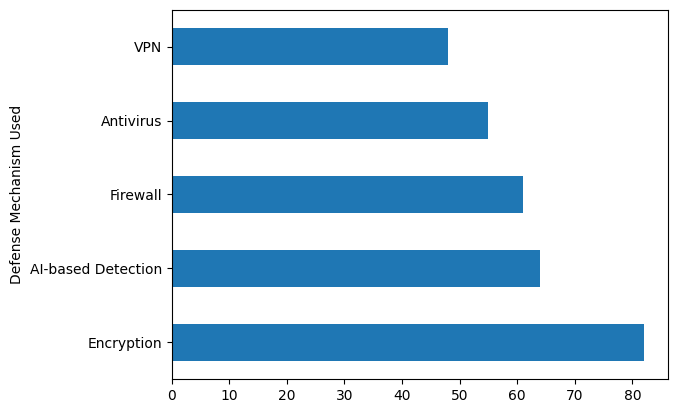

In [11]:
#Defense mechanisms
brasil["Defense Mechanism Used"].value_counts().plot(kind="barh")

In [12]:
#Mean Incident Resolution Time (in Hours)
mean = brasil["Incident Resolution Time (in Hours)"].mean()
print("Mean of hours to resolve an security indicent:",round(mean,2))

Mean of hours to resolve an security indicent: 37.76


In [13]:
#Vulnerability related to time to resolution
brasil[["Incident Resolution Time (in Hours)","Security Vulnerability Type"]].groupby("Security Vulnerability Type").mean()

,Incident Resolution Time (in Hours)
Security Vulnerability Type,
Social Engineering,41.469136
Unpatched Software,40.693548
Weak Passwords,38.207317
Zero-day,31.658824


In [14]:
#Atack type related to Incident resolution time (mean)
brasil[["Incident Resolution Time (in Hours)","Attack Type"]].groupby("Attack Type").mean().sort_values(by=["Incident Resolution Time (in Hours)"],ascending=False)

,Incident Resolution Time (in Hours)
Attack Type,
Man-in-the-Middle,41.681818
Ransomware,39.976744
Phishing,37.925926
DDoS,37.459016
SQL Injection,36.315789
Malware,34.313725


In [15]:
#Most targeted Industries
brasil["Target Industry"].value_counts()

,count
Target Industry,
Healthcare,50
IT,50
Banking,47
Education,47
Retail,44
Telecommunications,36
Government,36


In [16]:
#attack type by target industry:
brasil[["Target Industry","Attack Type"]].groupby("Target Industry").value_counts().unstack()

Attack Type,DDoS,Malware,Man-in-the-Middle,Phishing,Ransomware,SQL Injection
Target Industry,,,,,,
Banking,6,7,9,11,6,8
Education,9,7,9,7,5,10
Government,9,8,4,6,7,2
Healthcare,8,8,5,7,10,12
IT,9,9,6,11,5,10
Retail,8,6,8,8,6,8
Telecommunications,12,6,3,4,4,7


In [17]:
#financial loss infos

brasil["Financial Loss (in Million $)"].describe().round(2)

,Financial Loss (in Million $)
count,310.00
mean,50.91
std,29.61
min,1.01
25%,24.40
50%,53.98
75%,76.22
max,99.90


In [18]:
#Financial loss by industry

brasil[["Target Industry","Financial Loss (in Million $)"]].groupby("Target Industry").mean().sort_values(by="Financial Loss (in Million $)",ascending = False)

,Financial Loss (in Million $)
Target Industry,
Retail,52.813636
Healthcare,52.188200
Education,52.117234
IT,51.501800
Telecommunications,49.525000
Banking,48.766383
Government,48.608056


In [19]:
#Financial loss mean by target Industry and Year.
round(brasil[["Year","Target Industry","Financial Loss (in Million $)"]].groupby(["Target Industry","Year"]).mean().unstack(),2)

Financial Loss (in Million $)                              \
Year                                        2015   2016   2017   2018   2019   
Target Industry                                                                
Banking                                    53.11  57.17  58.42  38.53  35.25   
Education                                  37.54  53.64  54.86  37.09  65.81   
Government                                   NaN  62.92  49.43    NaN  39.24   
Healthcare                                 56.21  45.94  63.15  41.30  43.98   
IT                                         44.87  51.36  40.66  53.09  31.28   
Retail                                     67.26  46.38  34.27  50.44  35.61   
Telecommunications                           NaN  48.06  31.12  82.70  51.97   

                                                       
Year                 2020   2021   2022   2023   2024  
Target Industry                                        
Banking             56.92  46.30  50.80  53.82  44.40  
Education           59.23  54.12  68.75  55.65  34.54  
Government          43.38  57.66    NaN  34.78  56.38  
Healthcare          36.11  70.74  57.55  44.42  55.53  
IT                  69.94  75.67  35.48  52.14  56.49  
Retail              54.27  55.40  41.91  59.97  60.86  
Telecommunications  40.12  54.42  49.53  52.91  48.45

In [20]:
#Financial loss mean by Attack Type and Year.
round(brasil[["Year","Attack Type","Financial Loss (in Million $)"]].groupby(["Attack Type","Year"]).mean().unstack(),2)

Financial Loss (in Million $)                              \
Year                                       2015   2016   2017   2018   2019   
Attack Type                                                                   
DDoS                                      43.30  45.75  45.14  50.23  47.64   
Malware                                   53.98  83.33  47.15  37.58  22.12   
Man-in-the-Middle                         74.27  49.38  54.51  41.47  32.82   
Phishing                                  38.84  53.72  46.06  54.35  53.10   
Ransomware                                71.11   5.51  47.16  34.72  43.82   
SQL Injection                             60.35  40.01  33.76  68.12  58.64   

                                                      
Year                2020   2021   2022   2023   2024  
Attack Type                                           
DDoS               32.02  70.47  37.45  55.02  55.98  
Malware            60.78  67.92  35.36  47.84  70.92  
Man-in-the-Middle  40.11  52.67  71.83  47.05  31.79  
Phishing           51.63  63.31  69.02  49.01  67.78  
Ransomware         76.08  55.13   8.54  41.00  56.42  
SQL Injection      72.65  41.65  29.44  56.60  41.00

#Conclusion

Because the data is generated, the overall values ​​are very balanced. Therefore, some insights, such as the most common types of attacks, do not acquire discrepancies, so I have omitted some insights and analyses that would normally be included in this document.